In [52]:
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
from uncertainties import ufloat
from bokeh.plotting import figure, show, output_file, save
import matplotlib.pyplot as plt

### Data from a file into a Padans dataframe

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [40]:
data = pd.read_csv('./data_b.txt', sep=" ", header=None)
data.columns = ['Eneergia in eV','Conteggi']

In [41]:
data['weights']=data['Conteggi'].apply(lambda elem: 0.05*elem)

In [42]:
data.dtypes

Eneergia in eV      int64
Conteggi          float64
weights           float64
dtype: object

In [43]:
data

Eneergia in eV   Conteggi   weights
0                0   0.366037  0.018302
1                5   4.758470  0.237924
2               10  11.042100  0.552105
3               15  17.813800  0.890690
4               20  24.646600  1.232330
5               25  32.333400  1.616670
6               30  41.667100  2.083355
7               35  50.817800  2.540890
8               40  65.885900  3.294295
9               45  77.842900  3.892145
10              50  85.956500  4.297825
11              55  88.945700  4.447285
12              60  86.017500  4.300875
13              65  84.248300  4.212415
14              70  84.736400  4.236820
15              75  83.455300  4.172765
16              80  79.246000  3.962300
17              85  69.729200  3.486460
18              90  66.313000  3.315650
19              95  55.759200  2.787960
20             100  45.205400  2.260270
21             105  29.771100  1.488555
22             110  20.437100  1.021855
23             115  15.556600  0.777830

### A simple fitting function which uses padandas as input data

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [44]:
def fit_data(_func,_data,x='x',y='y',p0=None,bounds=(-np.inf,np.inf)):
    '''
    a simple exaple of fit function to which I pass data and the fitting function. This function assumes that the data is a Pandas dataframe and has columns named x,y and weights
    '''
    _x=_data[x]
    _y=_data[y]
    _weights=_data['weights']

    popt, pcov = curve_fit(_func, _x, _y,sigma=_weights,p0=p0,bounds=bounds)
   

    #
    #lin=ufloat(popt[1],np.sqrt(pcov[1,1]))
    #const=ufloat(popt[0],np.sqrt(pcov[0,0]))
    #
    return popt, pcov

In [39]:
?fit_data

In [18]:
def _func(x, N, w,e):
    return np.exp(-w*(x/e + e/x))*N

popt, pcov = fit_data(_func, data,p0=[1,1,60])



In [16]:
def _func2(x, N, w,e,N1, w1,e1):
    return np.exp(-w*(x/e + e/x))*N + np.exp(-w1*(x/e1 + e1/x))*N1

popt, pcov = fit_data(_func2, data,p0=[1,1,40,1,1,67],bounds=(0,np.inf) )

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

### Plotting with Bookeh

https://bokeh.pydata.org/en/latest/

https://bokeh.pydata.org/en/latest/docs/gallery.html

In [47]:
x = np.linspace(5, 120, 120)
y = _func(x,popt[0],popt[1],popt[2])
y = _func(x,popt[0],popt[1],popt[2])

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

p1 = figure(title="Plot Example", tools=TOOLS)
p1.circle(data['Eneergia in eV'], data['Conteggi'], legend="Data",color="orange")
p1.line(x, y, legend="function(x)")

output_file("legend.html", title="legend.py example")

save(p1)  # open a browser

'/Users/roberto/cernbox/Working/Teaching/Monte Carlo/Lezioni/legend.html'

In [50]:
x = np.linspace(5, 120, 120)
y = _func(x,popt[0],popt[1],popt[2])
y = _func(x,popt[0],popt[1],popt[2])

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

p1 = figure(title="Plot Example", tools=TOOLS)
p1.circle(data['Eneergia in eV'], data['Conteggi'], legend="Data",color="orange")
p1.line(x, y, legend="function(x)")

show(p1)
#output_file("legend.html", title="legend.py example")
#save(p1)  # open a browser

In [49]:
x = np.linspace(5, 120, 120)
y = _func2(x,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])


TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

p1 = figure(title="Plot Example", tools=TOOLS)
p1.circle(data['x'], data['y'], legend="Data",color="orange")
p1.line(x, y, legend="sin(x)")

output_file("legend2.html", title="legend.py example")

save(p1)  # open a browser

IndexError: index 3 is out of bounds for axis 0 with size 3

In [179]:
popt

array([  5.25809962e-02,   5.70577479e-01,   2.28190149e+01,
         7.30755630e+01,   3.47908362e+00,   5.84910518e+01])

In [178]:
pcov

array([[  5.85354353e-03,   7.06193105e-02,  -1.99748387e+00,
         -1.68031296e+01,  -1.27781971e-01,   8.52044496e-02],
       [  7.06193105e-02,   8.75316564e-01,  -2.52795923e+01,
         -2.16615829e+02,  -1.64466737e+00,   8.88380236e-01],
       [ -1.99748387e+00,  -2.52795923e+01,   7.47813392e+02,
          6.45687043e+03,   4.89779409e+01,  -2.22459415e+01],
       [ -1.68031296e+01,  -2.16615829e+02,   6.45687043e+03,
          6.46481361e+04,   4.80434465e+02,  -6.34962338e+01],
       [ -1.27781971e-01,  -1.64466737e+00,   4.89779409e+01,
          4.80434465e+02,   3.58215265e+00,  -5.77494305e-01],
       [  8.52044496e-02,   8.88380236e-01,  -2.22459415e+01,
         -6.34962338e+01,  -5.77494305e-01,   6.70322622e+00]])

### Plotting with Matplotlib

https://matplotlib.org/gallery/index.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html?highlight=errorbar#matplotlib.pyplot.errorbar   

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

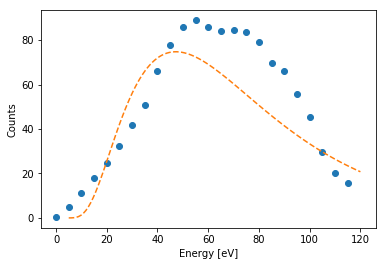

In [46]:
plt.plot(data['Eneergia in eV'],data['Conteggi'],'o')
plt.xlabel('Energy [eV]')
plt.ylabel('Counts')
x = np.linspace(5, 120, 120)
y = _func(x,popt[0],popt[1],popt[2])
plt.plot(x,y,'--')

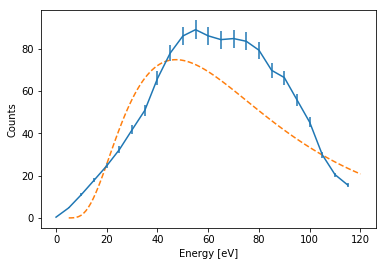

In [35]:
plt.errorbar(data['x'],data['y'],yerr=data['weights'])
plt.xlabel('Energy [eV]')
plt.ylabel('Counts')
x = np.linspace(5, 120, 120)
y = _func(x,popt[0],popt[1],popt[2])
plt.plot(x,y,'--')